# 教師あり学習

[Supervised learning: predicting an output variable from high-dimensional observations](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html)

- X - 観測データ（数値行列）
- y - ターゲット、ラベル (整数ベクトル or 文字列ベクトル)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np

## 線形モデル

- [Linear model: from regression to sparsity](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#linear-model-from-regression-to-sparsity)


### [Linear regression](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#linear-regression) （制約なしの線形回帰）

$\min_{w} \frac{1}{2n}\| Xw - y\|_{2}^{2}$
    
### [Ridge regression](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#shrinkage) （L２制約付き線形回帰）

$\min_{w} \frac{1}{2n}\| Xw - y\|_{2}^{2} + \alpha \| w \|_{2}^{2}$

### [Lasso regression](http://scikit-learn.org/stable/modules/linear_model.html#lasso) （L１制約付き線形回帰）

$\min_{w} \frac{1}{2n}\| Xw - y\|_{2}^{2} + \alpha \| w \|_{1}$

In [3]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [4]:
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

##  線形回帰モデル （Linear Regression）

目的：scikit-learnが裏で自動的にやってる計算を、自分でnumpyを使ってやってみる。

まず、scikit-learnで線形回帰

In [5]:
from sklearn import linear_model

### バイアス項なしの場合

In [6]:
# まずはバイアス項（intercept）を学習せずに0で固定
regr = linear_model.LinearRegression(fit_intercept=False)

In [7]:
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [8]:
print(regr.coef_)

[  42.91904734 -261.96047084  547.53776347  352.47037392 -634.02645384
  285.10016396   -9.40624498  197.49984569  670.75000627   11.66426388]


In [9]:
print(regr.intercept_)

0.0


In [10]:
mse = np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)
mse

21995.305740441618

裏では、この式を解いてる。

$\hat{w} = (X^{\top} X )^{-1} X^{T}y$

In [11]:
# scikit-learnを使わずにnumpyだけで上の式を計算
np.dot(np.linalg.inv(np.dot(diabetes_X_train.T, diabetes_X_train)), np.dot(diabetes_X_train.T, diabetes_y_train))

array([  42.91904734, -261.96047084,  547.53776347,  352.47037392,
       -634.02645384,  285.10016396,   -9.40624498,  197.49984569,
        670.75000627,   11.66426388])

scikit-learnで学習されたパラメータが、numpyで行列計算した結果と一致している。

In [12]:
# Adjusted-R square using training data
regr.score(diabetes_X_train, diabetes_y_train)

-3.4073324856447682

In [13]:
# Adjusted-R square using test data
regr.score(diabetes_X_test, diabetes_y_test)

-3.5528001019303055

### バイアス項ありの場合

次に、バイアス項（intercept）も学習してみる。
LinearRegression()ではこれがデフォルトの振る舞い。

In [14]:
# 以下の２つは同じ意味。
regr = linear_model.LinearRegression()
#regr = linear_model.LinearRegression(fit_intercept=True)

In [15]:
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print(regr.coef_)

[  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]


In [17]:
print(regr.intercept_)

152.764306916


今度はバイアス項を含めて、scikit-learnを使わずにnumpyだけで上の式を計算

In [18]:
# データ行列の一番右に常に1となる項を追加
X = np.hstack([diabetes_X_train, np.ones((diabetes_X_train.shape[0], 1))])

In [19]:
# numpyで上の式を再計算
np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, diabetes_y_train))

array([  3.03499549e-01,  -2.37639315e+02,   5.10530605e+02,
         3.27736980e+02,  -8.14131709e+02,   4.92814588e+02,
         1.02848452e+02,   1.84606489e+02,   7.43519617e+02,
         7.60951722e+01,   1.52764307e+02])

In [20]:
# Adjusted-R square using training data
regr.score(diabetes_X_train, diabetes_y_train)

0.51222621477934993

In [21]:
# Adjusted-R square using test data
regr.score(diabetes_X_test, diabetes_y_test)

0.58507530226905713

## Ridge Regression (Shrinkage)

- [Ridge regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)

In [22]:
X = np.c_[.5, 1].T

In [23]:
y = [.5, 1]

In [24]:
test = np.c_[0, 2].T

In [25]:
regr = linear_model.LinearRegression()

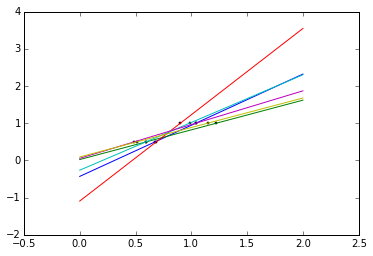

In [26]:
np.random.seed(0)

for _ in range(6):
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)

In [27]:
regr = linear_model.Ridge(alpha=.1)

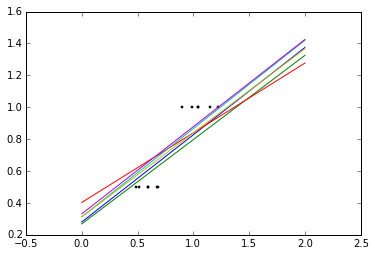

In [28]:
np.random.seed(0)
for _ in range(6):
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)

### bias variance tradeoff

**どんなalphaを選んだらいいの？**

In [29]:
alphas = np.logspace(-4, -1, 6)

In [30]:
alphas

array([ 0.0001    ,  0.00039811,  0.00158489,  0.00630957,  0.02511886,
        0.1       ])

In [31]:
scores = []
for alpha in alphas:
    score = regr.set_params(alpha=alpha).fit(diabetes_X_train, diabetes_y_train).score(diabetes_X_test, diabetes_y_test)
    scores.append(score)

[]

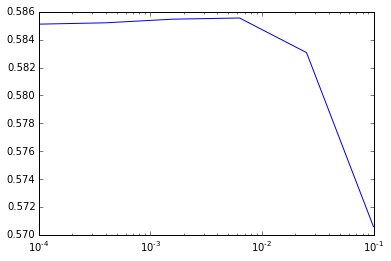

In [32]:
plt.plot(alphas, scores)
plt.semilogx()

In [33]:
alphas[np.argmax(scores)]

0.0063095734448019303

## Lasso Regression

- 参考資料：[Lasso (least absolute shrinkage and selection operator)](http://scikit-learn.org/stable/modules/linear_model.html#lasso)
 
- 予測に寄与しない特徴量の係数が0になるようにする
- sparse method
- Occam's razor
- [Lasso](http://scikit-learn.org/stable/modules/linear_model.html#lasso)の場合は勾配法で解いている
- [LassoLars](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html#sklearn.linear_model.LassoLars)の場合はLeast Angle Regression (LARS) アルゴリズムで解いている

In [34]:
regr = linear_model.Lasso()

In [35]:
scores = [regr
          .set_params(alpha=alpha)
          .fit(diabetes_X_train, diabetes_y_train)
          .score(diabetes_X_test, diabetes_y_test) 
          for alpha in alphas]

In [36]:
scores

[0.58511910691622271,
 0.58524713649060511,
 0.58571895391793527,
 0.58730094854527404,
 0.58876224183092607,
 0.5828450029681681]

[]

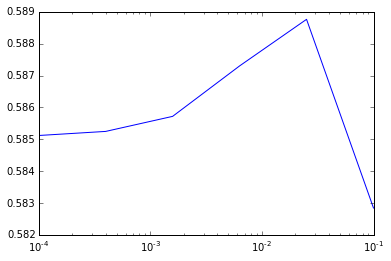

In [37]:
plt.plot(alphas, scores)
plt.semilogx()

In [38]:
best_alpha = alphas[np.argmax(scores)]
best_alpha

0.025118864315095794

In [39]:
regr.alpha = best_alpha

In [40]:
regr.fit(diabetes_X_train, diabetes_y_train)

Lasso(alpha=0.025118864315095794, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [41]:
print regr.coef_

[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982    -0.
 -187.19554705   69.38229038  508.66011217   71.84239008]


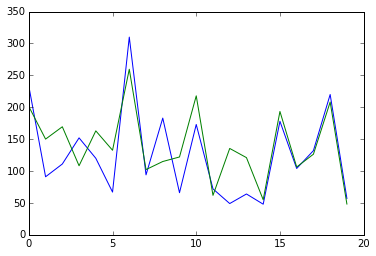

In [42]:
plt.plot(diabetes_y_test)
plt.plot(regr.predict(diabetes_X_test))

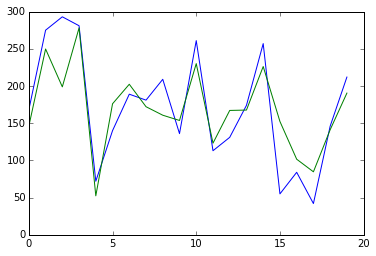

In [43]:
plt.plot(diabetes_y_train[-20:])
plt.plot(regr.predict(diabetes_X_train[-20:]))

# 分類（Classification）

In [44]:
# 分類で用いるiris datasetの読み込み

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

## KNN（分類モデル）

- K Nearest Neighbor (KNN)は最もシンプルな分類モデル
- 次元の呪いの影響を強く受けるモデル

- [k-Nearest neighbors (KNN) classifier](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#k-nearest-neighbors-classifier)
- [Nearest Neighbor](http://scikit-learn.org/stable/modules/neighbors.html#neighbors)
- [Nearest neighbor and the curse of dimensionality](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#nearest-neighbor-and-the-curse-of-dimensionality)


In [45]:
np.random.seed(0)

In [46]:
indices = np.random.permutation(len(iris_X))

In [47]:
iris_X_train =iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier()

In [50]:
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [51]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [52]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

## ロジスティック回帰（分類モデル）

### 制約なしのロジスティック回帰

$\min_{w}  \sum_{i=1}^{n}
\log(1 + \exp( - y_{i} x_{i}^{\top} w))$

### L2制約付きロジスティック回帰（shrinkage）- penalty="l2" 
- Cパラメータが制約の強さを決める。
- Cが小さいと制約が強まり、Cが大きいと制約が弱まる

$\min_{w} \frac{1}{2} \|w\|_{2} + C \sum_{i=1}^{n}
\log(1 + \exp( - y_{i} x_{i}^{\top} w))$

### L1制約付きロジスティック回帰（sparsity）- penalty="l1" 

$\min_{w} \|w\|_{1} + C \sum_{i=1}^{n}
\log(1 + \exp( - y_{i} x_{i}^{\top} w))$

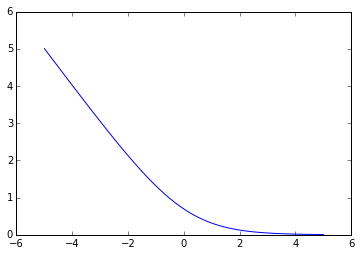

In [53]:
# softplus function
x = np.linspace(-5, 5)
plt.plot(x, np.log1p(np.exp(-x)))

In [54]:
logistic = linear_model.LogisticRegression(C=1e5)

In [55]:
logistic.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0)

In [56]:
logistic.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [57]:
#sigmoid = lambda x: 1. / (1 + np.exp(-x))

練習問題

Try classifying the digits dataset with nearest neighbors and a linear model. Leave out the last 10% and test prediction performance on these observations.
from sklearn import datasets, neighbors, linear_model

```
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
```

In [58]:
from sklearn import datasets, neighbors, linear_model

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

n_samples = len(X_digits)

X_train = X_digits[:.9 * n_samples]
y_train = y_digits[:.9 * n_samples]
X_test = X_digits[.9 * n_samples:]
y_test = y_digits[.9 * n_samples:]

knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression()

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.961111
LogisticRegression score: 0.938889


## Support Vector Machine

- [Support Vector Machine](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#support-vector-machines-svms)
- [Libsvm GUI](http://scikit-learn.org/stable/auto_examples/applications/svm_gui.html#example-applications-svm-gui-py) ← 使う

####注）SVMを含め多くのモデルでは、各特徴量の標準偏差を1にしておくことが良い予測精度を得るために重要。

In [59]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
#svc = svm.SVC(kernel='rbm')
#svc = svm.SVC(kernel='poly')
svc.fit(iris_X_train, iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

練習問題

Try classifying classes 1 and 2 from the iris dataset with SVMs, with the 2 first features. Leave out 10% of each class and test prediction performance on these observations.
Warning: the classes are ordered, do not leave out the last 10%, you would be testing on only one class.
Hint: You can use the decision_function method on a grid to get intuitions.

```
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]
```

[plot_iris_exercise.py](https://github.com/scikit-learn/scikit-learn/blob/master/examples/exercises/plot_iris_exercise.py)

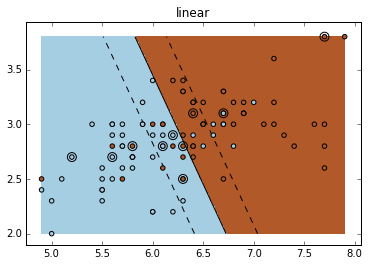

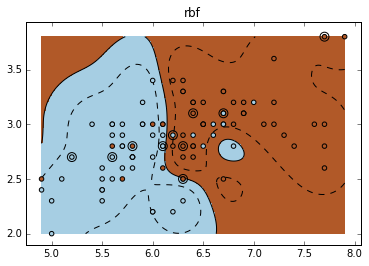

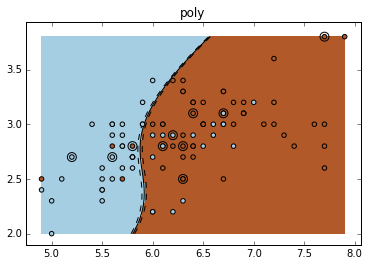

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:.9 * n_sample]
y_train = y[:.9 * n_sample]
X_test = X[.9 * n_sample:]
y_test = y[.9 * n_sample:]

# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()